<a href="https://colab.research.google.com/github/patriciagvas/Amazon_EDA/blob/main/Projeto_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo:**

Explorar o Amazon Sales Dataset envolve um processo passo a passo. Primeiro, limpamos e preparamos os dados para garantir que sejam precisos e consistentes. Em seguida, resumimos os dados usando estatísticas descritivas, como médias e intervalos. Em seguida, visualizamos os dados com tabelas e gráficos para ver padrões e relacionamentos.

Projeto baseado em: https://www.kaggle.com/code/mehakiftikhar/amazon-sales-dataset-eda

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
#Importar o arquivo csv com os dados de vendas da Amazon

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets - projetos/amazon.csv')
df.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_4

In [ ]:
# Analisar as colunas
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
# Entender o número de colunas e linhas
print(f"O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O DataFrame possui 1465 linhas e 16 colunas.


In [ ]:
# Analisar informações sobre o df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
# Analisar a presença de valores nulos
df.isnull().any()

,0
product_id,False
product_name,False
category,False
discounted_price,False
actual_price,False
discount_percentage,False
rating,False
rating_count,True
about_product,False
user_id,False


In [ ]:
df.isnull().sum() # dois valores nulos na coluna rating_count

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [ ]:
# Valores nulos
#Total de valores nulos no df
df.isnull().sum().sum()

2

In [ ]:
# Visualizar linhas com valores nulos na coluna
df[df['rating_count'].isnull()].head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [ ]:
# Preencher valores ausentes com a média
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].mean())

In [ ]:
df.isnull().sum().sum()

2

In [ ]:
# Mudar os tipos de dados das colunas
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

In [ ]:
print(df.discounted_price.dtypes)

float64


In [ ]:
df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [ ]:
print(df.actual_price.dtypes)

float64


In [ ]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

In [ ]:
print(df.discount_percentage.dtypes)

float64


In [ ]:
df['discount_percentage'] = df['discount_percentage'] / 100

In [ ]:
# Encontrando string incomum na coluna de classificação

df['rating'].value_counts()

,count
rating,
4.1,244
4.3,230
4.2,228
4.0,129
3.9,123
4.4,123
3.8,86
4.5,75
4,52


In [ ]:
df.query('rating == "|"') # O método query permite filtrar o DataFrame usando uma expressão de string. É uma maneira mais legível de escrever condições complexas do que usando indexação booleana.

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [ ]:
df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

In [ ]:
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [ ]:
print(df.rating_count.dtypes)

float64


In [ ]:
df['category'] = df['category'].str.replace('&', ', ').replace('|', ', ')

In [ ]:
print(df.category)

0       Computers, Accessories|Accessories, Peripheral...
1       Computers, Accessories|Accessories, Peripheral...
2       Computers, Accessories|Accessories, Peripheral...
3       Computers, Accessories|Accessories, Peripheral...
4       Computers, Accessories|Accessories, Peripheral...
                              ...                        
1460    Home, Kitchen|Kitchen, HomeAppliances|WaterPur...
1461    Home, Kitchen|Kitchen, HomeAppliances|SmallKit...
1462    Home, Kitchen|Heating,Cooling, AirQuality|Room...
1463    Home, Kitchen|Heating,Cooling, AirQuality|Fans...
1464    Home, Kitchen|Kitchen, HomeAppliances|SmallKit...
Name: category, Length: 1465, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [ ]:
# Encontrando e limpando duplicatas
df.duplicated().any() # nenhum valor duplicado nas linhas

False

In [ ]:
# Econtrar colunas duplicatas
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
any_duplicates = df.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link']).any()

print(any_duplicates) # Nenhuma coluna duplicada

False


**Estatística Descritiva**

In [ ]:
metricas  = round(df.describe(), 2)
print(metricas)

       discounted_price  actual_price  discount_percentage   rating  \
count           1465.00       1465.00              1465.00  1465.00   
mean            3125.31       5444.99                 0.48     4.10   
std             6944.30      10874.83                 0.22     0.29   
min               39.00         39.00                 0.00     2.00   
25%              325.00        800.00                 0.32     4.00   
50%              799.00       1650.00                 0.50     4.10   
75%             1999.00       4295.00                 0.63     4.30   
max            77990.00     139900.00                 0.94     5.00   

       rating_count  
count       1463.00  
mean       18295.54  
std        42753.86  
min            2.00  
25%         1186.00  
50%         5179.00  
75%        17336.50  
max       426973.00  


In [ ]:
# Média, moda e mediana para actual_price

# Média
media_price = round(df['actual_price'].mean(), 2)

# Mediana
mediana_price = round(df['actual_price'].median(), 2)

# Moda
moda_price = round(df['actual_price'].mode()[0], 2)

print(f"Média: {media_price}, Mediana: {mediana_price}, Moda: {moda_price}")

Média: 5444.99, Mediana: 1650.0, Moda: 999.0


In [ ]:
#Média de desconto por categoria de produtos

media_categoria = df.groupby('category')['discount_percentage'].mean().reset_index().sort_values(by = 'category', ascending = False)
print(media_categoria)

                                              category  discount_percentage
210  Toys, Games|Arts, Crafts|Drawing, PaintingSupp...                0.000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.130
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.175
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.050
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.000
..                                                 ...                  ...
4    Computers, Accessories|Accessories, Peripheral...                0.465
3    Computers, Accessories|Accessories, Peripheral...                0.565
2    Computers, Accessories|Accessories, Peripheral...                0.350
1    Computers, Accessories|Accessories, Peripheral...                0.785
0    Car, Motorbike|CarAccessories|InteriorAccessor...                0.420

[211 rows x 2 columns]


In [ ]:
#Média de rating por categoria de produtos

media_rating = round(df.groupby('category')['rating'].mean().reset_index().sort_values(by = 'category', ascending = False), 2)
print(media_rating)

                                              category  rating
210  Toys, Games|Arts, Crafts|Drawing, PaintingSupp...    4.30
209  OfficeProducts|OfficePaperProducts|Paper|Stati...    4.13
208  OfficeProducts|OfficePaperProducts|Paper|Stati...    4.30
207  OfficeProducts|OfficePaperProducts|Paper|Stati...    4.15
206  OfficeProducts|OfficePaperProducts|Paper|Stati...    4.25
..                                                 ...     ...
4    Computers, Accessories|Accessories, Peripheral...    4.05
3    Computers, Accessories|Accessories, Peripheral...    3.60
2    Computers, Accessories|Accessories, Peripheral...    3.50
1    Computers, Accessories|Accessories, Peripheral...    4.15
0    Car, Motorbike|CarAccessories|InteriorAccessor...    3.80

[211 rows x 2 columns]


In [ ]:
#Quais são os produtos com melhor classificação por categoria?
top_reviewed_per_category = (
    df.groupby('category')
    .apply(lambda x: x.nlargest(5, 'rating'))
    .reset_index(drop=True)
)

print(top_reviewed_per_category)

     product_id                                       product_name  \
0    B0912WJ87V  Reffair AX30 [MAX] Portable Air Purifier for C...   
1    B097C564GC  rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
2    B094DQWV9B  Kanget [2 Pack] Type C Female to USB A Male Ch...   
3    B009LJ2BXA  Hp Wired On Ear Headphones With Mic With 3.5 M...   
4    B08SCCG9D4  JBL Commercial CSLM20B Auxiliary Omnidirection...   
..          ...                                                ...   
588  B00LOD70SC  Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...   
589  B0746N6WML  Parker Vector Camouflage Gift Set - Roller Bal...   
590  B07SBGFDX9     Pentonic Multicolor Ball Point Pen, Pack of 10   
591  B00LZPQVMK  Parker Vector Standard Chrome Trim Ball Pen (I...   
592  B00DJ5N9VK  Faber-Castell Connector Pen Set - Pack of 25 (...   

                                              category  discounted_price  \
0    Car, Motorbike|CarAccessories|InteriorAccessor...            2339.0   
1    Co

In [ ]:
# Correlação entre discount_percentage e rating

correlacao = df[['discount_percentage', 'rating']].corr()

print(correlacao)

                     discount_percentage    rating
discount_percentage             1.000000 -0.154563
rating                         -0.154563  1.000000


**Data Visualization**

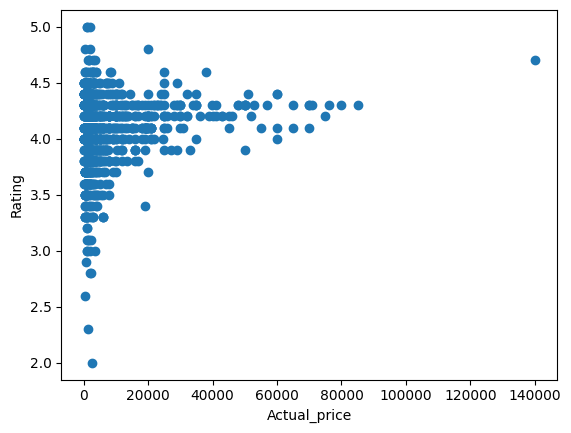

In [ ]:
# Gráfico de dispersão
plt.scatter(df['actual_price'], df['rating']) # inserir as colunas com valores para x, y, respectivamente
plt.xlabel('Actual_price') #eixos
plt.ylabel('Rating')
plt.show() #plotar o gráfico

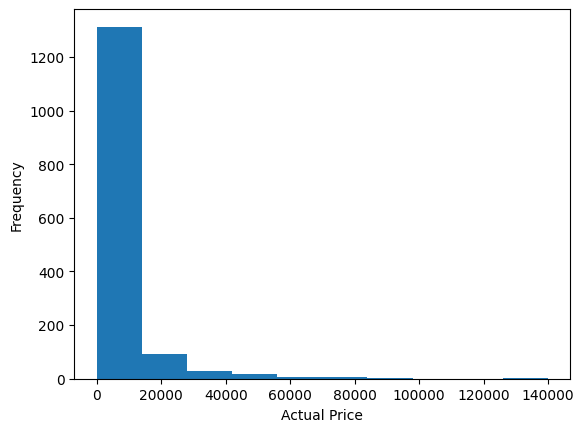

In [ ]:
# Histograma para actual_price
plt.hist(df['actual_price'])
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

Esse código utiliza a classe LabelEncoder da biblioteca scikit-learn para transformar variáveis categóricas em variáveis numéricas, que podem ser mais facilmente manipuladas em modelos de machine learning.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# label encode categorical variables

le_product_id = LabelEncoder()
le_category = LabelEncoder()
le_review_id = LabelEncoder()
le_review_content = LabelEncoder()
le_product_name = LabelEncoder()
le_user_name = LabelEncoder()
le_about_product = LabelEncoder()
le_user_id = LabelEncoder()
le_review_title = LabelEncoder()
le_img_link = LabelEncoder()
le_product_link = LabelEncoder()


df['product_id'] = le_product_id.fit_transform(df['product_id'])
df['category'] = le_category.fit_transform(df['category'])
df['review_id'] = le_review_id.fit_transform(df['review_id'])
df['review_content'] = le_review_content.fit_transform(df['review_content'])
df['product_name'] = le_product_name.fit_transform(df['product_name'])
df['user_name'] = le_user_name.fit_transform(df['user_name'])
df['about_product'] = le_about_product.fit_transform(df['about_product'])
df['user_id'] = le_user_id.fit_transform(df['user_id'])
df['review_title'] = le_review_title.fit_transform(df['review_title'])
df['img_link'] = le_img_link.fit_transform(df['img_link'])
df['product_link'] = le_product_link.fit_transform(df['product_link'])

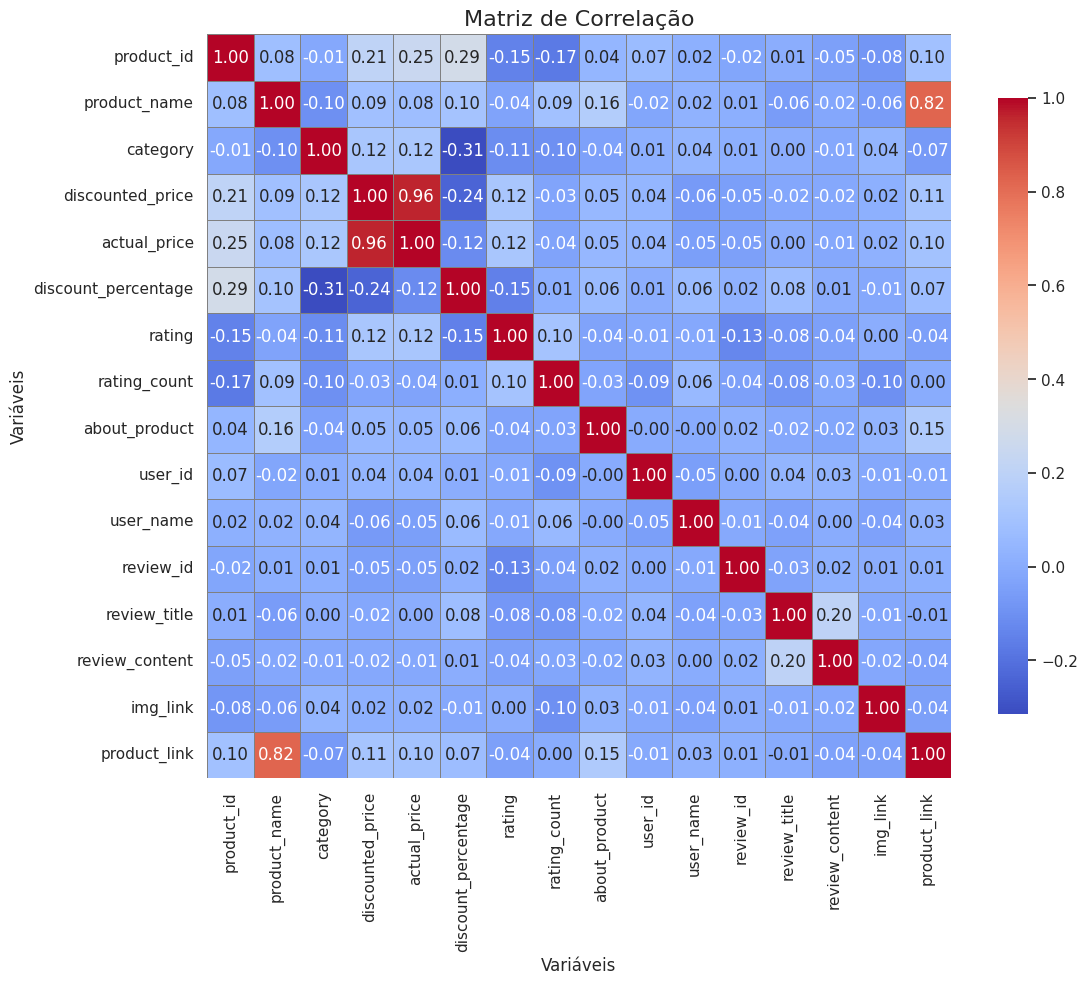

In [ ]:
# Mapa de calor para avaliar a correlação entre as variáveis
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo o estilo
sns.set(style='whitegrid')

# Criando a matriz de correlação
correlation_matrix = df.corr()

# Configurando a figura
plt.figure(figsize=(12, 10))

# Criando o heatmap
sns.heatmap(correlation_matrix,
            annot=True,                  # Mostra os valores
            fmt='.2f',                  # Formato dos números
            cmap='coolwarm',            # Paleta de cores
            square=True,                # Faz os quadrados do heatmap terem a mesma proporção
            cbar_kws={"shrink": .8},   # Ajusta a barra de cores
            linewidths=0.5,             # Espessura das linhas entre os quadrados
            linecolor='gray')           # Cor das linhas

# Adicionando título e rótulos
plt.title('Matriz de Correlação', fontsize=16)
plt.xlabel('Variáveis', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)

# Exibindo o gráfico
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

valor_hipotetico = 4  # Valor hipotético para a média de rating
t_stat, p_valor = stats.ttest_1samp(df['rating'], valor_hipotetico)

# Resultados do teste
print(f"Estatística t: {t_stat}, p-valor: {p_valor}")

# Interpretação do p-valor
if p_valor < 0.05:
    print("Rejeitamos a hipótese nula (H0), a média de rating é significativamente diferente de 4.")
else:
    print("Não podemos rejeitar a hipótese nula (H0), a média das vendas não é significativamente diferente de 4.")

Estatística t: 12.65920758685312, p-valor: 6.257923276939655e-35
Rejeitamos a hipótese nula (H0), a média de rating é significativamente diferente de 3,5.


In [ ]:
from scipy import stats

# Criando uma tabela de contingência
tabela = pd.crosstab(df['actual_price'], df['rating'])
print("Tabela de Contingência:")
print(tabela)

# Realizando o teste qui-quadrado
chi2, p_valor, _, _ = stats.chi2_contingency(tabela)
print(f"Estatística qui-quadrado: {chi2}, p-valor: {p_valor}")

Tabela de Contingência:
rating        2.0  2.3  2.6  2.8  2.9  3.0  3.1  3.2  3.3  3.4  ...  4.0  4.1  \
actual_price                                                    ...             
39.0            0    0    0    0    0    0    0    0    0    0  ...    0    0   
50.0            0    0    0    0    0    0    0    0    0    0  ...    0    0   
59.0            0    0    0    0    0    0    0    0    0    0  ...    0    0   
75.0            0    0    0    0    0    0    0    0    0    0  ...    0    1   
79.0            0    0    0    0    0    0    0    0    0    0  ...    1    0   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
74999.0         0    0    0    0    0    0    0    0    0    0  ...    0    0   
75990.0         0    0    0    0    0    0    0    0    0    0  ...    0    0   
79990.0         0    0    0    0    0    0    0    0    0    0  ...    0    0   
85000.0         0    0    0    0    0    0    0    0    0    0  ...    0    0   
1399

category
Car, Motorbike|CarAccessories|InteriorAccessories|AirPurifiers, Ionizers                                                    41.52
Computers, Accessories|Accessories, Peripherals|Adapters|USBtoUSBAdapters                                                   78.39
Computers, Accessories|Accessories, Peripherals|Audio, VideoAccessories|PCHeadsets                                          35.04
Computers, Accessories|Accessories, Peripherals|Audio, VideoAccessories|PCMicrophones                                       56.34
Computers, Accessories|Accessories, Peripherals|Audio, VideoAccessories|PCSpeakers                                          46.72
                                                                                                                            ...  
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils, WritingSupplies|Pens, Refills|GelInkRollerballPens         0.00
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils, WritingSupplies

<ipython-input-124-59d2c881f977>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_discount_per_category.index, y=avg_discount_per_category.values, palette='viridis')


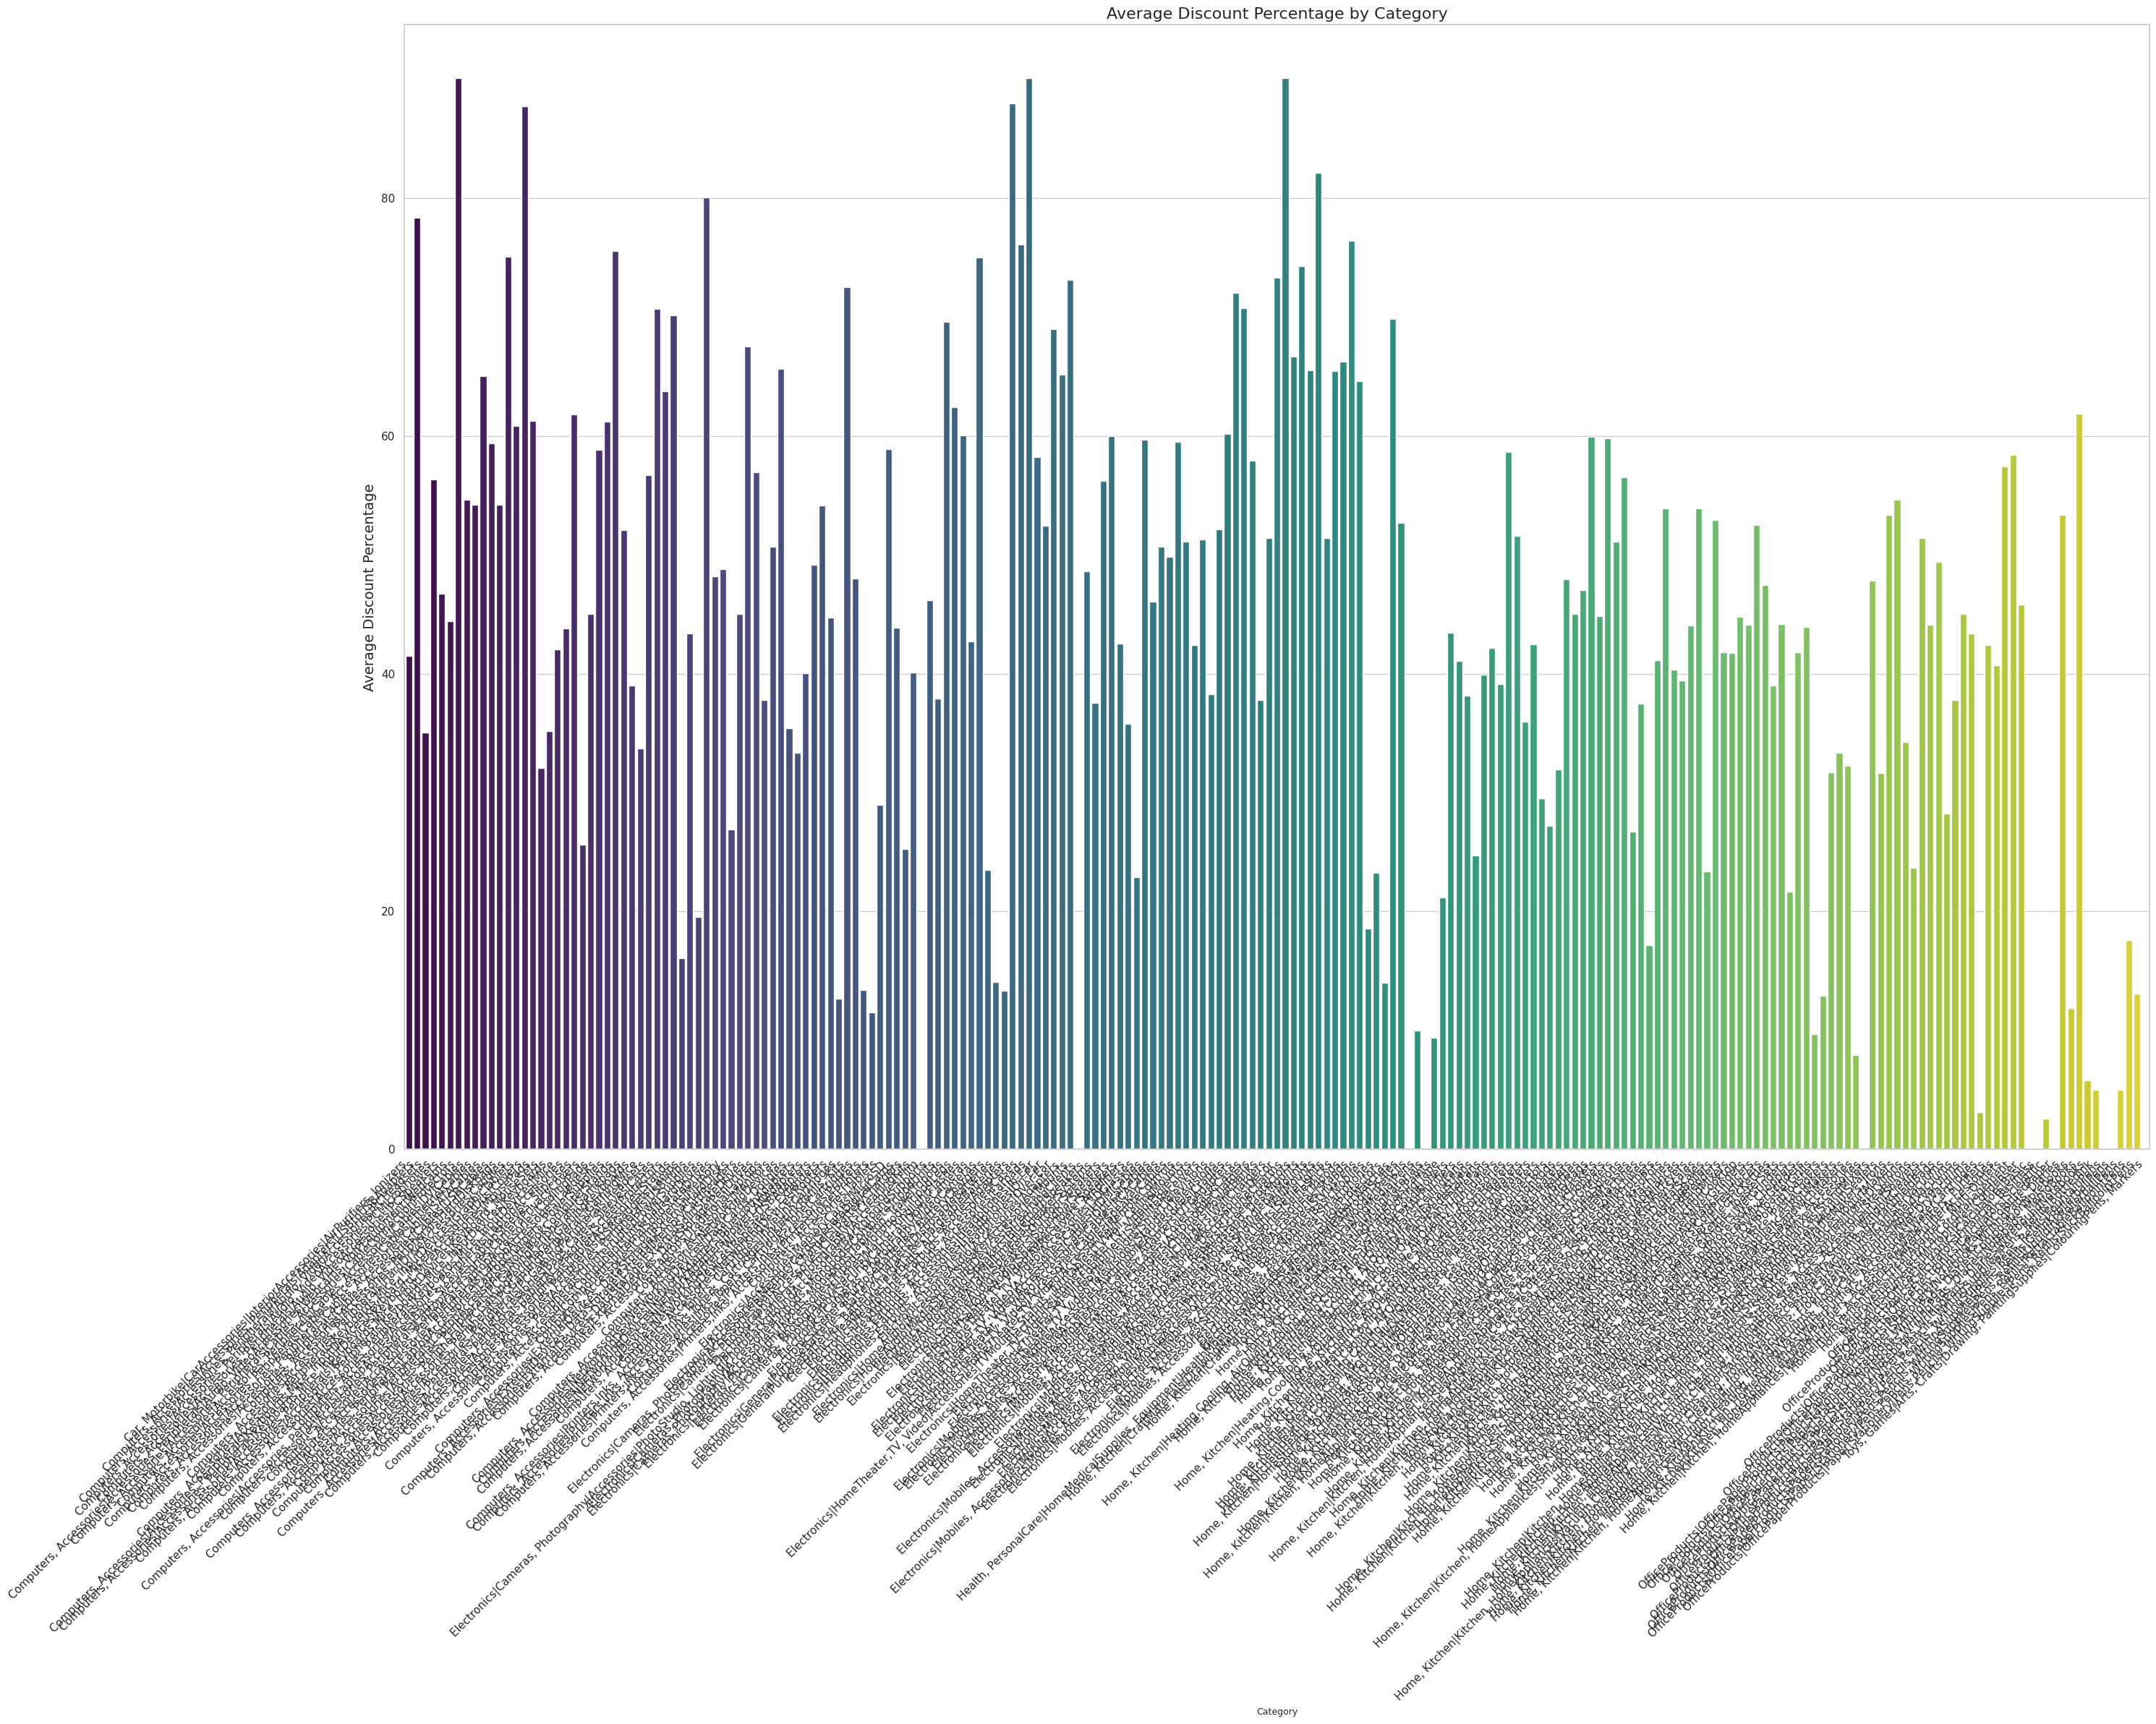

In [ ]:
# Como a porcentagem média de desconto varia entre as categorias?

avg_discount_per_category = round(df.groupby('category')['discount_percentage'].mean(), 2)
print(avg_discount_per_category)

plt.figure(figsize=(30, 24))

# Gráfico de barras
sns.barplot(x=avg_discount_per_category.index, y=avg_discount_per_category.values, palette='viridis')

# Rótulos e título
plt.xlabel("Category", fontsize=9)
plt.ylabel("Average Discount Percentage", fontsize=14)
plt.title("Average Discount Percentage by Category", fontsize=16)

# Rotacionar rótulos do eixo x
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Nome de produtos mais populares
product_counts = df["product_name"].value_counts()
print(product_counts.sort_values(ascending=False).head(10))

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)                 3
Pinnaclz Original Combo of 2 Micro USB Fast Charging Cable, USB Charging Cable for Data Transfer Perfect for Android Smart Phones White 1.2 Meter Made in India (Pack of 2)                                3
Portronics Konnect L POR-1081 Fast Charging 3A Type-C Cable 1.2Meter with Charge & Sync Function for All Type-C Devices (Grey)                                         